# Reproduction of figures from papers on the AdEx mean-field 

## Carlu et al. 2020

Carlu, M., Chehab, O., Dalla Porta, L., Depannemaecker, D., Héricé, C., Jedynak, M., Köksal Ersöz, E., Muratore, P., Souihel, S., Capone, C., Zerlaut, Y., Destexhe, A., & di Volo, M. (2020). A mean-field approach to the dynamics of networks of complex neurons, from nonlinear Integrate-and-Fire to Hodgkin-Huxley models. Journal of Neurophysiology, 123(3), 1042–1051. https://doi.org/10.1152/jn.00399.2019

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import numpy as np

from tvb.simulator.lab import *
from utils import load_tvb_model_toml, plot_normal, AlphaFunction

In [3]:
adex = load_tvb_model_toml(models.ZerlautAdaptationSecondOrder,'cfgs/carlu2020.toml')
adex

### Fig 3: Spontaneous activity

We run the model on a disconnected network, so only local dynamics govern the activity. 

In [4]:
conn = connectivity.Connectivity.from_file()
conn.speed = np.r_[np.inf]

sim = simulator.Simulator(
    model=adex,
    connectivity=conn,
    conduction_speed=conn.speed.item(),
    coupling=coupling.Linear(a=np.r_[0.0]),
    integrator=integrators.HeunDeterministic( dt = 0.1,),
    monitors=[monitors.TemporalAverage(period=1.0)],
).configure()

WARNING  File 'hemispheres' not found in ZIP.


In [5]:
(out_t, out_d),  = sim.configure().run(simulation_length=5000)

WARNING  random_state supplied for non-stochastic integration


Now we plot the mean and variance of the excitatory and inhibitory populations at the end of simulation.

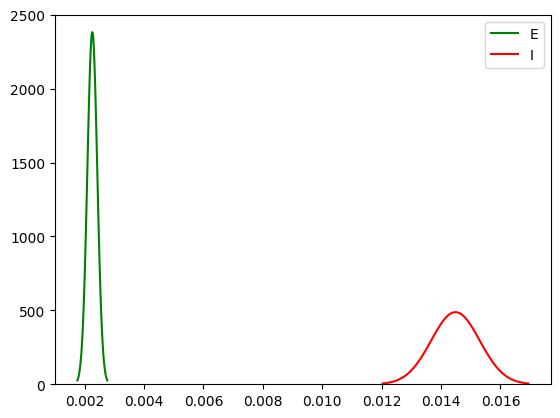

In [6]:
E = out_d[-1,0,0,0]
I = out_d[-1,1,0,0]
C_ee = out_d[-1,2,0,0]
C_ii = out_d[-1,4,0,0]

fig, ax = plt.subplots()
plot_normal(E, np.sqrt(C_ee),ax, c='g', label='E')
plot_normal(I, np.sqrt(C_ii),ax, c='r', label='I')
ax.set_ylim(bottom=0)
ax.legend()

### Fig 4: response to stimulus 

Making advantage of the disconnected network, we run at the same time for multiple values of the stimulus.

In [7]:
conn = connectivity.Connectivity.from_file()
conn.speed = np.r_[np.inf]

sim = simulator.Simulator(
    model=adex,
    connectivity=conn,
    conduction_speed=conn.speed.item(),
    coupling=coupling.Linear(a=np.r_[0.0]),
    integrator=integrators.HeunDeterministic( dt = 0.1,),
    monitors=[monitors.TemporalAverage(period=1.0)],
    stimulus=patterns.StimuliRegion(
        temporal=AlphaFunction(
            parameters=dict(amp=1., t_0=1500.0, T_1=100.0, T_2=100.0, b=0.0)
        ),
        connectivity=conn,
        weight=np.linspace(1.,20.,len(conn.weights))
    ),
).configure()


WARNING  File 'hemispheres' not found in ZIP.


In [8]:
(out_t, out_d),  = sim.run(simulation_length=2500)

WARNING  random_state supplied for non-stochastic integration


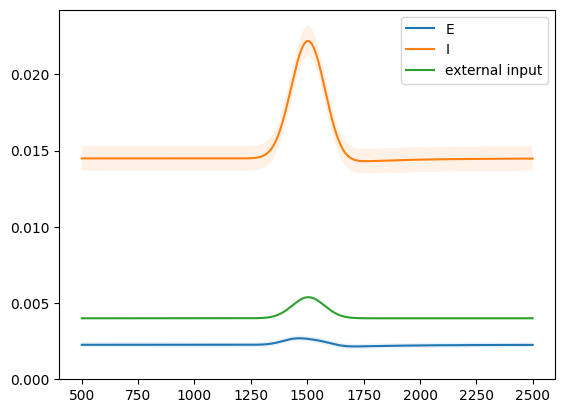

In [11]:
n = 25
t0=500


t = out_t[t0:]
E = out_d[t0:,0,n,0]
I = out_d[t0:,1,n,0]
C_ee = out_d[t0:,2,n,0]
C_ii = out_d[t0:,4,n,0]
ou = out_d[t0:, -1,7,0]

fig, ax = plt.subplots()
ax.plot(out_t[t0:], E, label='E')
ax.fill_between(t, E-np.sqrt(C_ee), E+np.sqrt(C_ee), alpha=0.1)
ax.plot(out_t[t0:], I, label='I')
ax.fill_between(t, I-np.sqrt(C_ii), I+np.sqrt(C_ii), alpha=0.1)
ax.set_ylim(bottom=0)
ax.plot(out_t[t0:], ou * sim.model.weight_noise + sim.model.external_input_ex_ex, label='external input')
ax.legend()

Below is the plot for all state variables and all the scaling of the stimulus (nodes of the disconnected network).

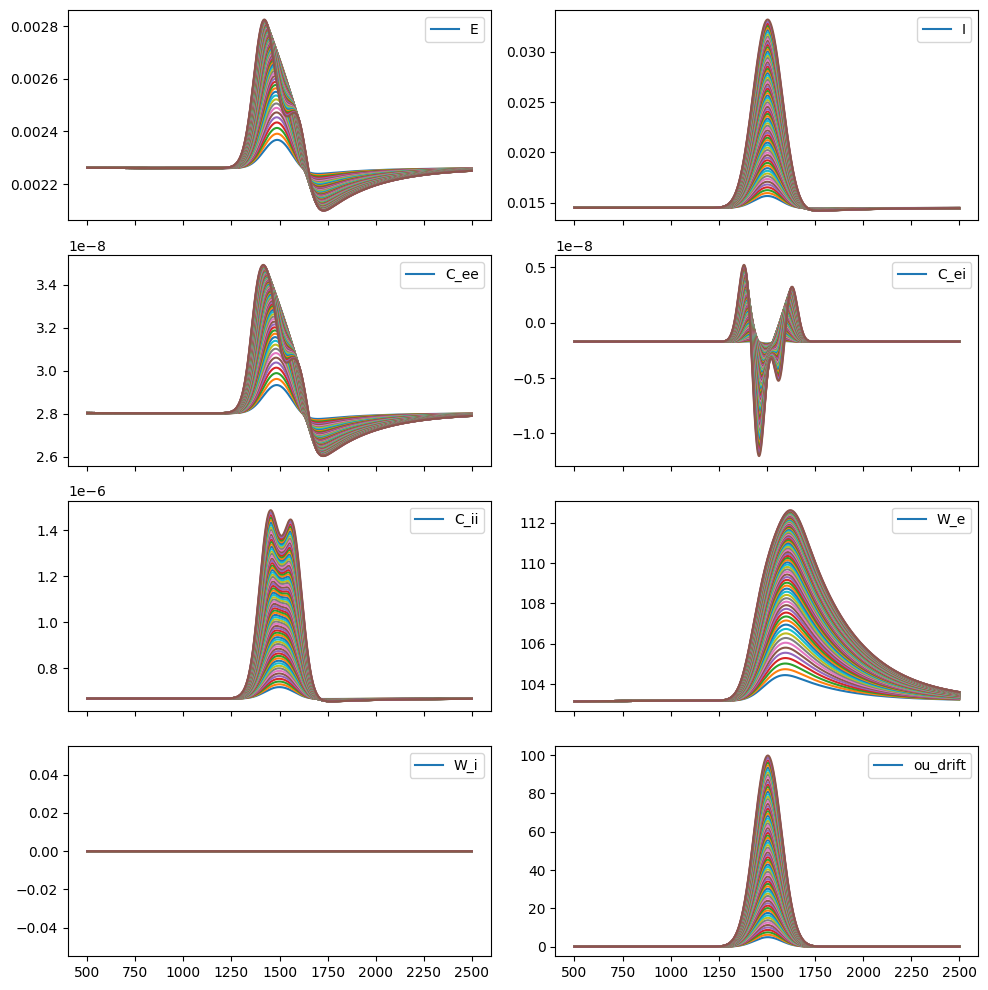

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

## diVolo et al. 2019

Volo, M. di, Romagnoni, A., Capone, C., & Destexhe, A. (2019). Biologically Realistic Mean-Field Models of Conductance-Based Networks of Spiking Neurons with Adaptation. Neural Computation, 31(4), 653–680. https://doi.org/10.1162/neco_a_01173

In [13]:
%matplotlib inline

In [14]:
import matplotlib.pylab as plt
import numpy as np

from tvb.simulator.lab import *
from utils import load_tvb_model_toml, plot_normal, AlphaFunction

In [15]:
adex = load_tvb_model_toml(models.ZerlautAdaptationSecondOrder,'cfgs/divolo2019.toml')
adex

### Fig 2: Spontaneous activity

We run the model on a disconnected network, so only local dynamics govern the activity. 

In [16]:
sim.model.b_e = np.linspace(0, 150, len(sim.connectivity.weights))[:,np.newaxis]

(out_t, out_d),  = sim.configure().run(simulation_length=5000)

WARNING  random_state supplied for non-stochastic integration


In [17]:
out_d.shape

(5000, 8, 76, 1)

In [18]:
E = out_d[-1,0,:,0]
I = out_d[-1,1,:,0]
C_ee = out_d[-1,2,:,0]
C_ii = out_d[-1,4,:,0]

[Text(0.5, 23.52222222222222, 'firing rate')]

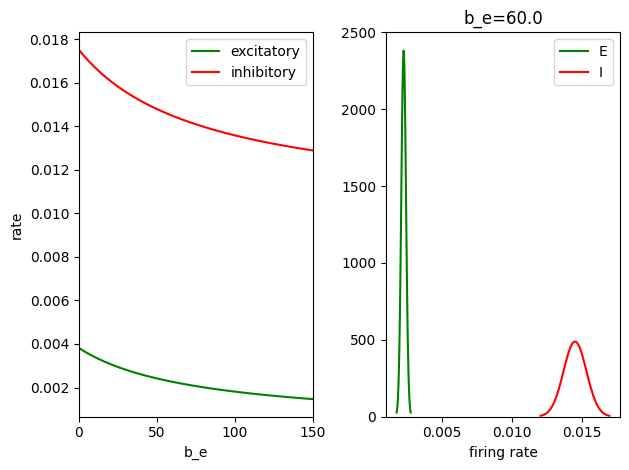

In [19]:
n=30
fig, axs = plt.subplots(ncols=2)
ax=axs[0]
ax.plot(sim.model.b_e,E, c='g', label='excitatory')
ax.plot(sim.model.b_e,I, c='r', label='inhibitory')
ax.legend()
ax.set_xlim(0,150)
ax.set(xlabel='b_e', ylabel='rate')

ax=axs[1]
plot_normal(E[n], np.sqrt(C_ee[n]),ax, c='g', label='E')
plot_normal(I[n], np.sqrt(C_ii[n]),ax, c='r', label='I')
ax.set_ylim(bottom=0)
ax.legend()
ax.set(title=f'b_e={sim.model.b_e[30].item()}')
fig.tight_layout()
ax.set(xlabel='firing rate')